# AnomalyDetection in Network Traffic

# Problem Statement:-
Develop a Binomial Classification(Activity is normal or attack) model for anomaly detection system for network traffic that can accurately identify and alert on unusual or suspicious activities, such as cyberattacks, within a network to enhance cybersecurity and ensure the integrity and availability of network services.

# Importing the necessary libraries

In [56]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import IsolationForest
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier

# Importing and reading the dataset

In [2]:
df= pd.read_csv("C:/Study/Network_anomaly_data.csv")

In [3]:
df

,duration,protocoltype,service,flag,srcbytes,dstbytes,land,wrongfragment,urgent,hot,...,dsthostsamesrvrate,dsthostdiffsrvrate,dsthostsamesrcportrate,dsthostsrvdiffhostrate,dsthostserrorrate,dsthostsrvserrorrate,dsthostrerrorrate,dsthostsrvrerrorrate,attack,lastflag
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20
125969,8,udp,private,SF,105,145,0,0,0,0,...,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal,21
125970,0,tcp,smtp,SF,2231,384,0,0,0,0,...,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal,18
125971,0,tcp,klogin,S0,0,0,0,0,0,0,...,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20


In [4]:
df.head()

,duration,protocoltype,service,flag,srcbytes,dstbytes,land,wrongfragment,urgent,hot,...,dsthostsamesrvrate,dsthostdiffsrvrate,dsthostsamesrcportrate,dsthostsrvdiffhostrate,dsthostserrorrate,dsthostsrvserrorrate,dsthostrerrorrate,dsthostsrvrerrorrate,attack,lastflag
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 43 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   duration                125973 non-null  int64  
 1   protocoltype            125973 non-null  object 
 2   service                 125973 non-null  object 
 3   flag                    125973 non-null  object 
 4   srcbytes                125973 non-null  int64  
 5   dstbytes                125973 non-null  int64  
 6   land                    125973 non-null  int64  
 7   wrongfragment           125973 non-null  int64  
 8   urgent                  125973 non-null  int64  
 9   hot                     125973 non-null  int64  
 10  numfailedlogins         125973 non-null  int64  
 11  loggedin                125973 non-null  int64  
 12  numcompromised          125973 non-null  int64  
 13  rootshell               125973 non-null  int64  
 14  suattempted         

In [6]:
df.describe()

,duration,srcbytes,dstbytes,land,wrongfragment,urgent,hot,numfailedlogins,loggedin,numcompromised,...,dsthostsrvcount,dsthostsamesrvrate,dsthostdiffsrvrate,dsthostsamesrcportrate,dsthostsrvdiffhostrate,dsthostserrorrate,dsthostsrvserrorrate,dsthostrerrorrate,dsthostsrvrerrorrate,lastflag
count,125973.00000,1.259730e+05,1.259730e+05,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,...,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000
mean,287.14465,4.556674e+04,1.977911e+04,0.000198,0.022687,0.000111,0.204409,0.001222,0.395736,0.279250,...,115.653005,0.521242,0.082951,0.148379,0.032542,0.284452,0.278485,0.118832,0.120240,19.504060
std,2604.51531,5.870331e+06,4.021269e+06,0.014086,0.253530,0.014366,2.149968,0.045239,0.489010,23.942042,...,110.702741,0.448949,0.188922,0.308997,0.112564,0.444784,0.445669,0.306557,0.319459,2.291503
min,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000
50%,0.00000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,63.000000,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
75%,0.00000,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000,21.000000
max,42908.00000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,77.000000,5.000000,1.000000,7479.000000,...,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000


In [7]:
df.shape

(125973, 43)

In [8]:
num_columns = df.select_dtypes(exclude = "object").columns
num_columns

Index(['duration', 'srcbytes', 'dstbytes', 'land', 'wrongfragment', 'urgent',
       'hot', 'numfailedlogins', 'loggedin', 'numcompromised', 'rootshell',
       'suattempted', 'numroot', 'numfilecreations', 'numshells',
       'numaccessfiles', 'numoutboundcmds', 'ishostlogin', 'isguestlogin',
       'count', 'srvcount', 'serrorrate', 'srvserrorrate', 'rerrorrate',
       'srvrerrorrate', 'samesrvrate', 'diffsrvrate', 'srvdiffhostrate',
       'dsthostcount', 'dsthostsrvcount', 'dsthostsamesrvrate',
       'dsthostdiffsrvrate', 'dsthostsamesrcportrate',
       'dsthostsrvdiffhostrate', 'dsthostserrorrate', 'dsthostsrvserrorrate',
       'dsthostrerrorrate', 'dsthostsrvrerrorrate', 'lastflag'],
      dtype='object')

# Data Pre-processing

In [9]:
#As we can see 'land', 'urgent', 'numfailedlogins', 'numoutboundcmds' have mostly zero values so we can drop these columns.
df.drop(['land','urgent','numfailedlogins','numoutboundcmds'],axis=1,inplace=True)

In [10]:
df.drop_duplicates()

,duration,protocoltype,service,flag,srcbytes,dstbytes,wrongfragment,hot,loggedin,numcompromised,...,dsthostsamesrvrate,dsthostdiffsrvrate,dsthostsamesrcportrate,dsthostsrvdiffhostrate,dsthostserrorrate,dsthostsrvserrorrate,dsthostrerrorrate,dsthostsrvrerrorrate,attack,lastflag
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,1,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,1,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20
125969,8,udp,private,SF,105,145,0,0,0,0,...,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal,21
125970,0,tcp,smtp,SF,2231,384,0,0,1,0,...,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal,18
125971,0,tcp,klogin,S0,0,0,0,0,0,0,...,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20


In [11]:
df.isna().sum()

duration                  0
protocoltype              0
service                   0
flag                      0
srcbytes                  0
dstbytes                  0
wrongfragment             0
hot                       0
loggedin                  0
numcompromised            0
rootshell                 0
suattempted               0
numroot                   0
numfilecreations          0
numshells                 0
numaccessfiles            0
ishostlogin               0
isguestlogin              0
count                     0
srvcount                  0
serrorrate                0
srvserrorrate             0
rerrorrate                0
srvrerrorrate             0
samesrvrate               0
diffsrvrate               0
srvdiffhostrate           0
dsthostcount              0
dsthostsrvcount           0
dsthostsamesrvrate        0
dsthostdiffsrvrate        0
dsthostsamesrcportrate    0
dsthostsrvdiffhostrate    0
dsthostserrorrate         0
dsthostsrvserrorrate      0
dsthostrerrorrate   

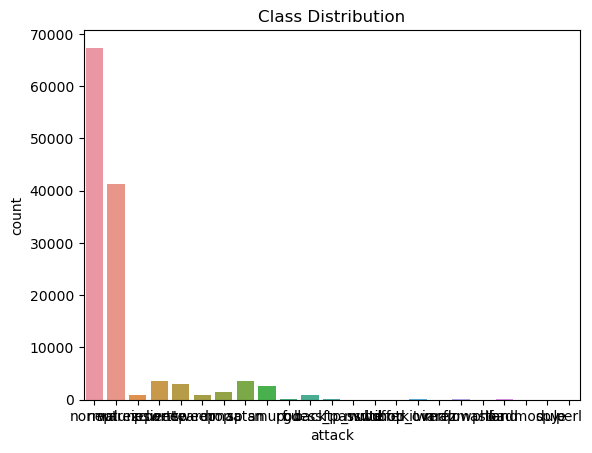

In [12]:
# Visualization for class distribution
sns.countplot(x='attack', data=df)
plt.title('Class Distribution')
plt.show()

In [13]:
df.select_dtypes(exclude=[np.number])

,protocoltype,service,flag,attack
0,tcp,ftp_data,SF,normal
1,udp,other,SF,normal
2,tcp,private,S0,neptune
3,tcp,http,SF,normal
4,tcp,http,SF,normal
...,...,...,...,...
125968,tcp,private,S0,neptune
125969,udp,private,SF,normal
125970,tcp,smtp,SF,normal
125971,tcp,klogin,S0,neptune


In [14]:
# Separate features and target variable
X = df.drop(['attack'], axis=1)  # Assuming 'attack' is the target variable
y = df['attack']

In [15]:
X

,duration,protocoltype,service,flag,srcbytes,dstbytes,wrongfragment,hot,loggedin,numcompromised,...,dsthostsrvcount,dsthostsamesrvrate,dsthostdiffsrvrate,dsthostsamesrcportrate,dsthostsrvdiffhostrate,dsthostserrorrate,dsthostsrvserrorrate,dsthostrerrorrate,dsthostsrvrerrorrate,lastflag
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,20
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,19
3,0,tcp,http,SF,232,8153,0,0,1,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,21
4,0,tcp,http,SF,199,420,0,0,1,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,tcp,private,S0,0,0,0,0,0,0,...,25,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,20
125969,8,udp,private,SF,105,145,0,0,0,0,...,244,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,21
125970,0,tcp,smtp,SF,2231,384,0,0,1,0,...,30,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,18
125971,0,tcp,klogin,S0,0,0,0,0,0,0,...,8,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,20


In [16]:
y

0          normal
1          normal
2         neptune
3          normal
4          normal
           ...   
125968    neptune
125969     normal
125970     normal
125971    neptune
125972     normal
Name: attack, Length: 125973, dtype: object

In [17]:
# Encode categorical variables
label_encoder = LabelEncoder()
X['protocoltype'] = label_encoder.fit_transform(X['protocoltype'])
X['service'] = label_encoder.fit_transform(X['service'])
X['flag'] = label_encoder.fit_transform(X['flag'])

In [18]:
# Outlier Detection
iso_forest = IsolationForest(contamination=0.05, random_state=42)
outliers = iso_forest.fit_predict(X)
X_no_outliers = X[outliers != -1]
y_no_outliers = y[outliers != -1]

C:\Users\sanci\AppData\Local\Temp\ipykernel_18536\4128540675.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['count'])


<Axes: xlabel='count', ylabel='Density'>

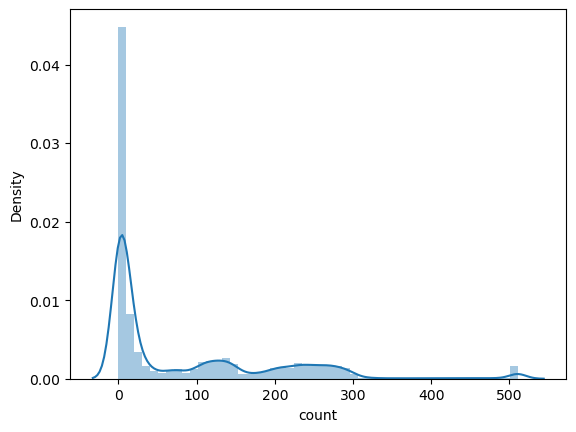

In [19]:
sns.distplot(df['count'])

<Axes: >

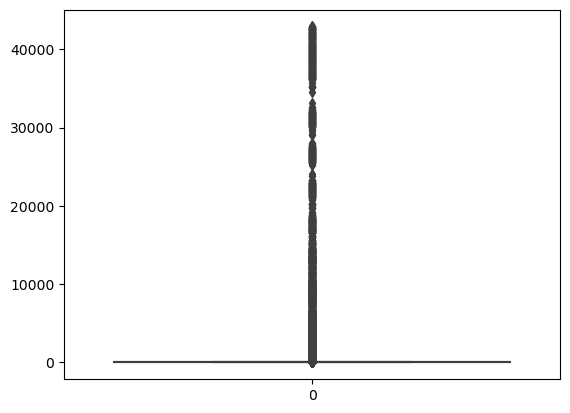

In [20]:
sns.boxplot(df['duration'])

<Axes: >

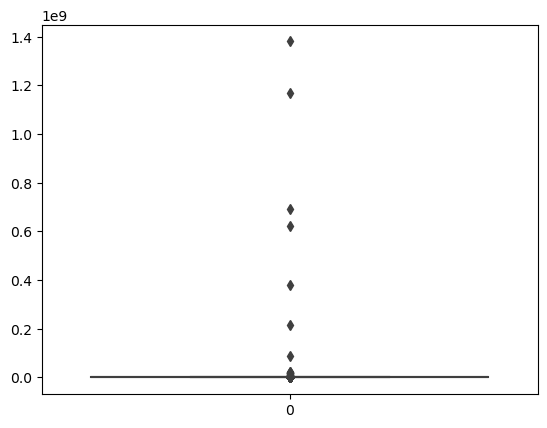

In [21]:
sns.boxplot(df['srcbytes'])

<Axes: >

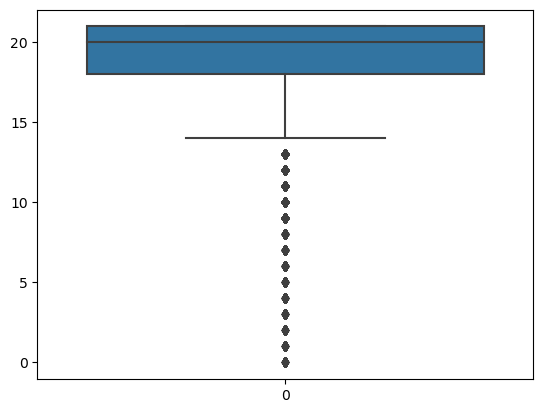

In [22]:
sns.boxplot(df['lastflag'])

<Axes: >

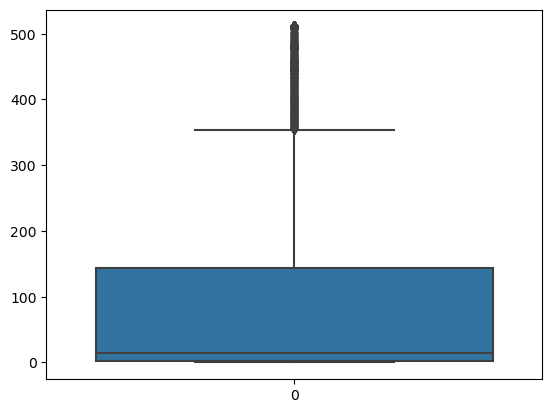

In [23]:
sns.boxplot(df['count'])

# Treating the outliers

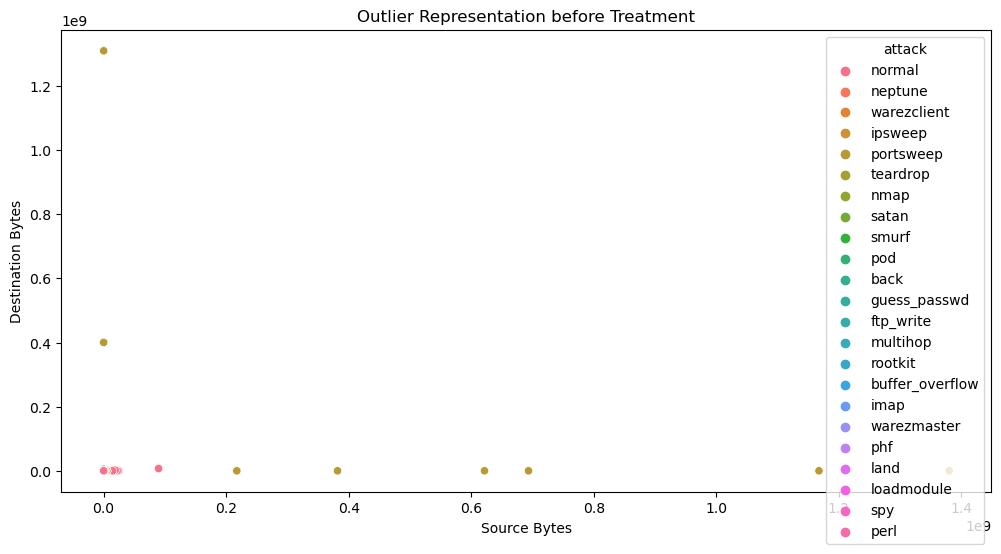

In [64]:
# Visualization before treating outliers
plt.figure(figsize=(12, 6))
sns.scatterplot(x='srcbytes', y='dstbytes', hue='attack', data=df)
plt.title('Outlier Representation before Treatment')
plt.xlabel('Source Bytes')
plt.ylabel('Destination Bytes')
plt.show()

C:\Users\sanci\AppData\Local\Temp\ipykernel_18536\2769427159.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = df[column].apply(lambda x: upper_limit if x > upper_limit else (lower_limit if x < lower_limit else x))
C:\Users\sanci\AppData\Local\Temp\ipykernel_18536\2769427159.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = df[column].apply(lambda x: upper_limit if x > upper_limit else (lower_limit if x < lower_limit else x))
C:\Users\sanci\AppData\Local\Temp\ipykernel_18536\27

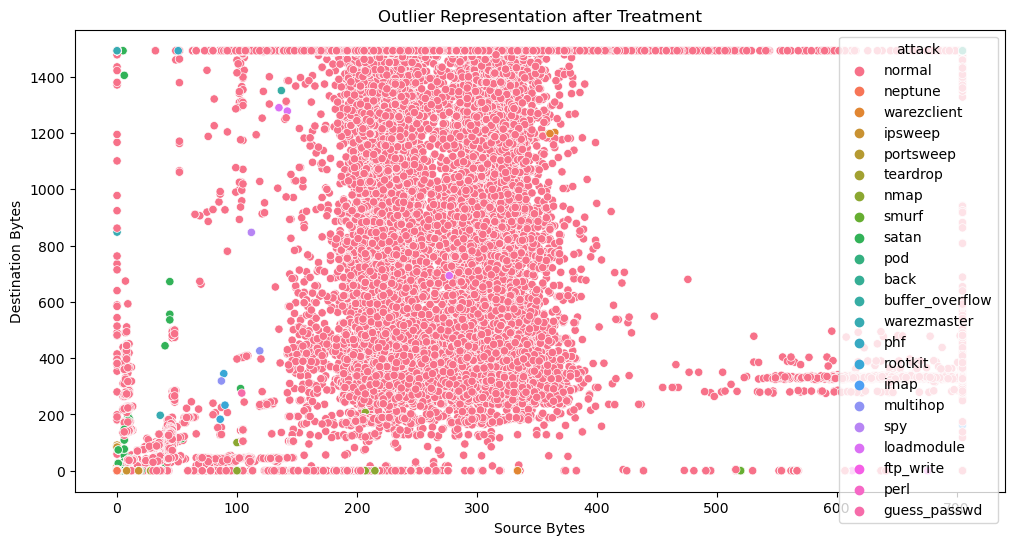

In [29]:
# Function to treat outliers using IQR method
def treat_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    df[column] = df[column].apply(lambda x: upper_limit if x > upper_limit else (lower_limit if x < lower_limit else x))

# Treat outliers for numerical columns
for column in X_no_outliers.select_dtypes(include=np.number).columns:
    treat_outliers_iqr(X_no_outliers, column)

# Merge treated X_no_outliers with y_no_outliers
df_treated = pd.concat([X_no_outliers, y_no_outliers], axis=1)

# Visualization after treating outliers
plt.figure(figsize=(12, 6))
sns.scatterplot(x='srcbytes', y='dstbytes', hue='attack', data=df_treated)
plt.title('Outlier Representation after Treatment')
plt.xlabel('Source Bytes')
plt.ylabel('Destination Bytes')
plt.show()

The scatterplot provided shows the relationship between "srcbytes" and "dstbytes" after treating the outliers, and it appears to have fewer extreme values compared to the original outlier representation.

# Visualization before and after treating the outliers

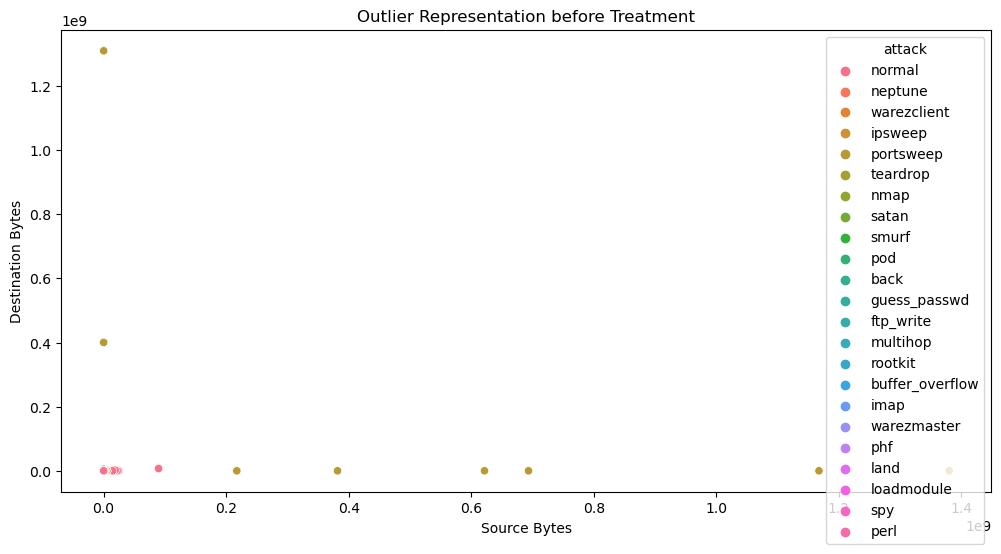

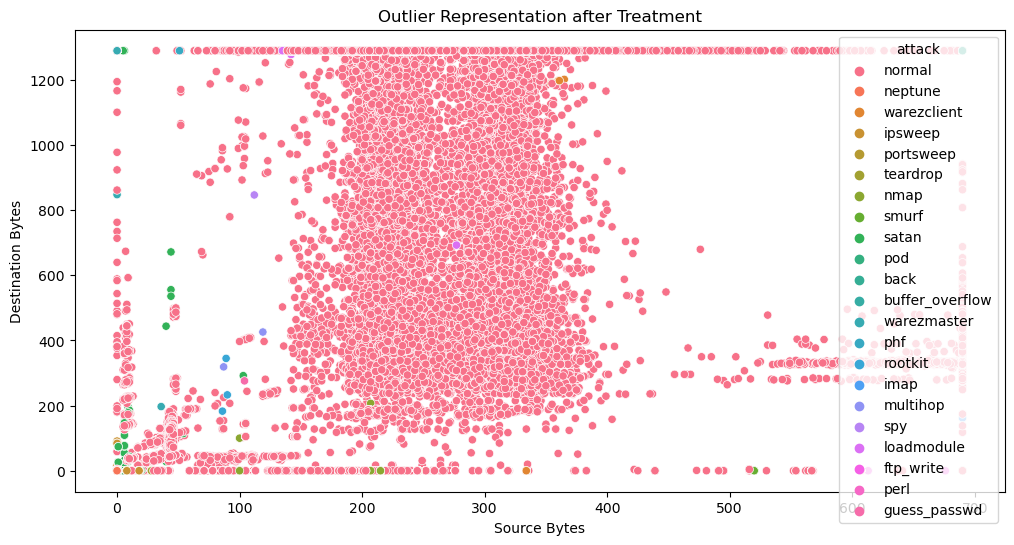

In [61]:
# Visualization before treating outliers
plt.figure(figsize=(12, 6))
sns.scatterplot(x='srcbytes', y='dstbytes', hue='attack', data=df)
plt.title('Outlier Representation before Treatment')
plt.xlabel('Source Bytes')
plt.ylabel('Destination Bytes')
plt.show()

# Function to treat outliers using IQR method
def treat_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    df[column] = df[column].apply(lambda x: upper_limit if x > upper_limit else (lower_limit if x < lower_limit else x))

# Treat outliers for numerical columns
X_no_outliers = X.copy()  # Make a copy to avoid modifying original data
for column in X_no_outliers.select_dtypes(include=np.number).columns:
    treat_outliers_iqr(X_no_outliers, column)

# Merge treated X_no_outliers with y_no_outliers
df_treated = pd.concat([X_no_outliers, y_no_outliers], axis=1)

# Visualization after treating outliers
plt.figure(figsize=(12, 6))
sns.scatterplot(x='srcbytes', y='dstbytes', hue='attack', data=df_treated)
plt.title('Outlier Representation after Treatment')
plt.xlabel('Source Bytes')
plt.ylabel('Destination Bytes')
plt.show()

In [30]:
# Compute summary statistics
summary_stats = df_treated.describe()
print(summary_stats)

       duration  protocoltype        service           flag       srcbytes  \
count  119717.0      119717.0  119717.000000  119717.000000  119717.000000   
mean        0.0           1.0      30.759207       7.172757     177.101907   
std         0.0           0.0      16.304803       2.528291     227.424167   
min         0.0           1.0       0.000000       0.000000       0.000000   
25%         0.0           1.0      20.000000       5.000000       0.000000   
50%         0.0           1.0      24.000000       9.000000      45.000000   
75%         0.0           1.0      49.000000       9.000000     282.000000   
max         0.0           1.0      69.000000      10.000000     705.000000   

            dstbytes  wrongfragment       hot       loggedin  numcompromised  \
count  119717.000000       119717.0  119717.0  119717.000000        119717.0   
mean      391.158478            0.0       0.0       0.409674             0.0   
std       581.050683            0.0       0.0       0.491

# Model building

In [31]:
#Model Building
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_treated.drop('attack', axis=1), df_treated['attack'], test_size=0.2, random_state=42)

## Logistic Regression

In [50]:
# Initialize the Logistic Regression model
logistic_reg = LogisticRegression(random_state=42)
# Train the model
logistic_reg.fit(X_train, y_train)

C:\Users\sanci\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [51]:
# Predictions
y_pred_logistic = logistic_reg.predict(X_test)

In [54]:
# Evaluate model performance
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
classification_report_logistic = classification_report(y_test, y_pred_logistic)
conf_matrix_logistic = confusion_matrix(y_test, y_pred_logistic)
precision_logistic = precision_score(y_test, y_pred_logistic, average=None)
recall_logistic = recall_score(y_test, y_pred_logistic, average=None)
f1_logistic = f1_score(y_test, y_pred_logistic, average=None)
cv_scores_logistic = cross_val_score(logistic_reg, X_train, y_train, cv=5)

C:\Users\sanci\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sanci\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sanci\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sanci\anaconda3\Lib\site-packages\sklearn\metr

In [55]:
# Print evaluation metrics
print("Logistic Regression Model Metrics:")
print(f'Accuracy: {accuracy_logistic}')
print(f'Classification Report:\n{classification_report_logistic}')
print("Confusion Matrix:")
print(conf_matrix_logistic)
print("Precision:", precision_logistic)
print("Recall:", recall_logistic)
print("F1 Score:", f1_logistic)
print("Cross-Validation Scores:", cv_scores_logistic)

Logistic Regression Model Metrics:
Accuracy: 0.9500501169395256
Classification Report:
                 precision    recall  f1-score   support

           back       0.78      0.79      0.79       164
buffer_overflow       0.00      0.00      0.00         3
      ftp_write       0.00      0.00      0.00         1
           imap       0.00      0.00      0.00         1
        ipsweep       0.70      0.76      0.73       648
     loadmodule       0.00      0.00      0.00         2
       multihop       0.00      0.00      0.00         1
        neptune       0.97      0.99      0.98      8210
           nmap       0.07      0.00      0.01       247
         normal       0.96      0.99      0.98     13163
           perl       0.00      0.00      0.00         1
            pod       0.69      0.21      0.33        42
      portsweep       0.61      0.85      0.71       276
        rootkit       0.00      0.00      0.00         1
          satan       0.42      0.11      0.17       323


## Random Forest

In [34]:
#Train a Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [35]:
# Evaluate model performance
y_pred = rf_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
classification_report = classification_report(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(f'Classification Report:\n{classification_report}')

C:\Users\sanci\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sanci\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.9941112596057468
Classification Report:
                 precision    recall  f1-score   support

           back       1.00      0.99      1.00       164
buffer_overflow       1.00      1.00      1.00         3
      ftp_write       0.00      0.00      0.00         1
           imap       0.00      0.00      0.00         1
        ipsweep       0.90      0.93      0.91       648
     loadmodule       0.00      0.00      0.00         2
       multihop       0.00      0.00      0.00         1
        neptune       1.00      1.00      1.00      8210
           nmap       0.79      0.73      0.76       247
         normal       1.00      1.00      1.00     13163
           perl       1.00      1.00      1.00         1
            pod       0.93      0.98      0.95        42
      portsweep       0.98      1.00      0.99       276
        rootkit       0.00      0.00      0.00         1
          satan       1.00      0.99      0.99       323
          smurf       1.00      1.0

C:\Users\sanci\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [36]:
#Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[  163     0     0     0     0     0     0     0     0     1     0     0
      0     0     0     0     0     0     0]
 [    0     3     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0]
 [    0     0     0     0     0     1     0     0     0     0     0     0
      0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0     0     1     0     0
      0     0     0     0     0     0     0]
 [    0     0     0     0   600     0     0     0    48     0     0     0
      0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0     0     2     0     0
      0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0     0     0     0     0
      0     1     0     0     0     0     0]
 [    0     0     0     0     0     0     0  8207     0     0     0     0
      3     0     0     0     0     0     0]
 [    0     0     0     0    6

In [37]:
#Precision, Recall, and F1 Score
precision = precision_score(y_test, y_pred, average=None)
recall = recall_score(y_test, y_pred, average=None)
f1 = f1_score(y_test, y_pred, average=None)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

C:\Users\sanci\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Precision: [1.         1.         0.         0.         0.9009009  0.
 0.         1.         0.78695652 0.99901313 1.         0.93181818
 0.97526502 0.         1.         0.99801587 1.         1.
 1.        ]
Recall: [0.99390244 1.         0.         0.         0.92592593 0.
 0.         0.99963459 0.73279352 0.99977209 1.         0.97619048
 1.         0.         0.9876161  0.9960396  1.         0.96153846
 1.        ]
F1 Score: [0.9969419  1.         0.         0.         0.91324201 0.
 0.         0.99981726 0.75890985 0.99939247 1.         0.95348837
 0.98747764 0.         0.99376947 0.99702676 1.         0.98039216
 1.        ]


In [38]:
#Cross-Validation
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(rf_classifier, X_train, y_train, cv=5)
print("Cross-Validation Scores:", cv_scores)

C:\Users\sanci\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Cross-Validation Scores: [0.99363091 0.99363091 0.99472723 0.99352616 0.9950402 ]


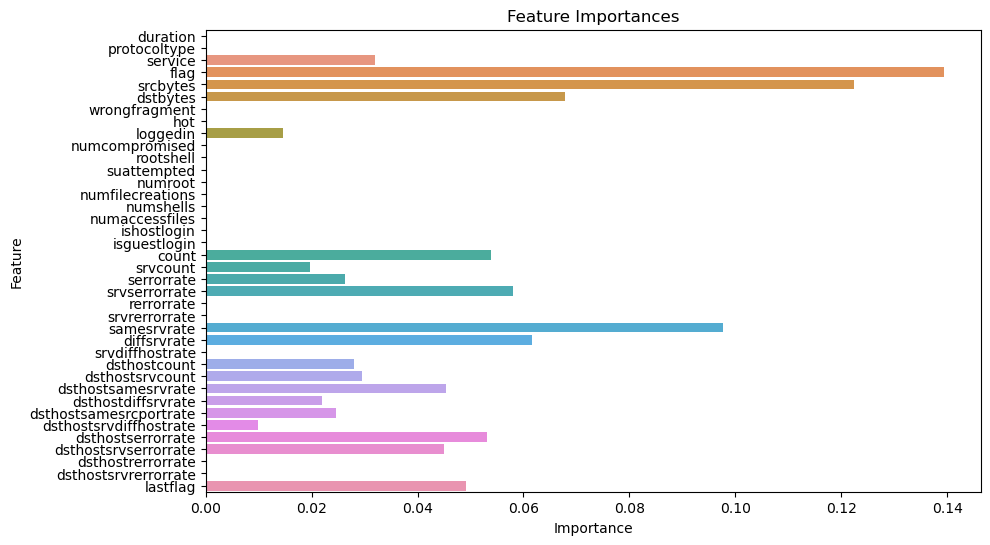

In [39]:
#Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(x=rf_classifier.feature_importances_, y=X_train.columns)
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

## XG Boost

In [40]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [41]:
import xgboost as xgb

In [42]:
from sklearn.preprocessing import LabelEncoder

In [43]:
# Convert string labels to integer labels using LabelEncoder
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

In [44]:
# Initialize and Train the XGBoost Model
xgb_classifier = xgb.XGBClassifier(
    objective='multi:softmax',  # for multi-class classification
    num_class=len(label_encoder.classes_),  # number of unique classes
    learning_rate=0.1,
    max_depth=3,
    n_estimators=100,
    random_state=42
)

xgb_classifier.fit(X_train, y_train_encoded)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None, num_class=22,
              num_parallel_tree=None, ...)

In [45]:
# Predictions
y_pred_xgb_encoded = xgb_classifier.predict(X_test)

In [46]:
# Convert predictions back to original string labels
y_pred_xgb = label_encoder.inverse_transform(y_pred_xgb_encoded)

In [47]:
# Evaluation
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb, average=None)
recall_xgb = recall_score(y_test, y_pred_xgb, average=None)
f1_xgb = f1_score(y_test, y_pred_xgb, average=None)

C:\Users\sanci\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [48]:
print("XGBoost Model Metrics:")
print("Accuracy:", accuracy_xgb)
print("Precision:", precision_xgb)
print("Recall:", recall_xgb)
print("F1 Score:", f1_xgb)

XGBoost Model Metrics:
Accuracy: 0.9946541931172737
Precision: [0.99390244 0.5        0.         0.         0.87432432 0.
 0.         1.         1.         0.99855766 0.         0.93181818
 0.99272727 0.         0.99375    0.99801587 1.         0.97814208
 0.83333333]
Recall: [0.99390244 0.66666667 0.         0.         0.99845679 0.
 0.         0.99951279 0.63157895 0.99931627 0.         0.97619048
 0.98913043 0.         0.98452012 0.9960396  1.         0.98351648
 1.        ]
F1 Score: [0.99390244 0.57142857 0.         0.         0.93227666 0.
 0.         0.99975634 0.77419355 0.99893682 0.         0.95348837
 0.99092559 0.         0.98911353 0.99702676 1.         0.98082192
 0.90909091]


## Ada Boost

In [57]:
# Initialize the AdaBoost classifier
adaboost_classifier = AdaBoostClassifier(random_state=42)

# Train the model
adaboost_classifier.fit(X_train, y_train)

AdaBoostClassifier(random_state=42)

In [58]:
# Predictions
y_pred_adaboost = adaboost_classifier.predict(X_test)

In [59]:
# Evaluate model performance
accuracy_adaboost = accuracy_score(y_test, y_pred_adaboost)
classification_report_adaboost = classification_report(y_test, y_pred_adaboost)
conf_matrix_adaboost = confusion_matrix(y_test, y_pred_adaboost)
precision_adaboost = precision_score(y_test, y_pred_adaboost, average=None)
recall_adaboost = recall_score(y_test, y_pred_adaboost, average=None)
f1_adaboost = f1_score(y_test, y_pred_adaboost, average=None)
cv_scores_adaboost = cross_val_score(adaboost_classifier, X_train, y_train, cv=5)

C:\Users\sanci\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sanci\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sanci\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sanci\anaconda3\Lib\site-packages\sklearn\metr

In [60]:
# Print evaluation metrics
print("AdaBoost Classifier Model Metrics:")
print(f'Accuracy: {accuracy_adaboost}')
print(f'Classification Report:\n{classification_report_adaboost}')
print("Confusion Matrix:")
print(conf_matrix_adaboost)
print("Precision:", precision_adaboost)
print("Recall:", recall_adaboost)
print("F1 Score:", f1_adaboost)
print("Cross-Validation Scores:", cv_scores_adaboost)

AdaBoost Classifier Model Metrics:
Accuracy: 0.8740811894420314
Classification Report:
                 precision    recall  f1-score   support

           back       0.00      0.00      0.00       164
buffer_overflow       0.00      0.00      0.00         3
      ftp_write       0.00      0.00      0.00         1
           imap       0.00      0.00      0.00         1
        ipsweep       0.00      0.00      0.00       648
     loadmodule       0.00      0.00      0.00         2
       multihop       0.00      0.00      0.00         1
        neptune       0.91      1.00      0.95      8210
           nmap       0.00      0.00      0.00       247
         normal       0.85      0.97      0.90     13163
           perl       0.00      0.00      0.00         1
            pod       0.00      0.00      0.00        42
      portsweep       0.00      0.00      0.00       276
        rootkit       0.00      0.00      0.00         1
          satan       0.00      0.00      0.00       323


Based on these metrics, both Random Forest and XGBoost demonstrate superior performance compared to Logistic Regression and AdaBoost. However, between Random Forest and XGBoost, XGBoost slightly outperforms Random Forest in terms of accuracy and F1-score. XGBoost achieves the highest accuracy among all models (~99.5%).
XGBoost also demonstrates high precision, recall, and F1-score across different classes, indicating its ability to effectively classify instances.
The cross-validation scores for XGBoost are consistently high, suggesting robustness and generalization capability.
XGBoost is known for its scalability, speed, and ability to handle complex datasets effectively.
XGBoost often performs well in various machine learning competitions and real-world applications.